<a href="https://colab.research.google.com/github/pratikktiwari/ML-Learnings/blob/main/01_Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow
There are many definitions for a regression problem but in our case, we're going to to simplify it: predicting numerical variables based on some other combination of variables, even shorter... predicting number.

In [1]:
# Import TensforFlow
import tensorflow as tf
print(tf.__version__)

2.8.2


## Creating data to view and fit

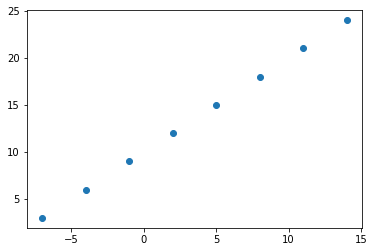

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y)

In [3]:
# Relationship

y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [8]:
# Scalar has no shape
X[0].ndim

0

In [9]:
X[0], y[0]

(-7.0, 3.0)

In [10]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

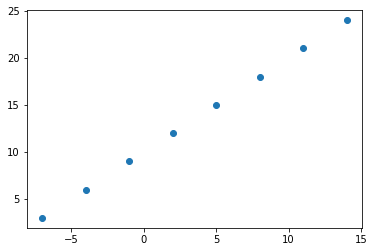

In [12]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the ***loss function*** (in other words, the function which tells out model how wrong it is) and the ***optimizer*** (tells our model how to improve the patterns it is learning) and ***evaluation metrics*** (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

![image.png](https://raw.githubusercontent.com/pratikktiwari/ML-Learnings/main/resources/regression-steps.png?token=GHSAT0AAAAAABQ3M2PPCKOGBQU5BDUWWXZUYVURCGA)

* **Loss**: How wrong the model's predictions are compared to the truth labels (this should be minimized)
* **Optimizer**: How the model should update its internal patterns to better its predictions
* **Metrics**: Human interpretable values for how well the model is doing
* **Epochs**: How many times the model will go through all of the training examples

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API

model = tf.keras.Sequential(
    [tf.keras.layers.Dense(1, input_shape=[1])] # take 1 neuron, shape of a single feature
)

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean absolute error => comparision of predicted vs observed => loss = mean(abs(y_true - y_pred), axis=-1)
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochasitc gradient descent => tells neural network how it should improve
              metrics=["mae"]) 

# Fit the model
model.fit(X, y, epochs=5) # Look at X and y and figure out pattern. Try 5 times.



Epoch 1/5
1/1 [==============================] - 1s 543ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 10.9748 - mae: 10.9748


In [14]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Try and make a prediction using our trained model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [16]:
y_pred + 11 # loss = 10.9 ~ 11

array([[23.71602]], dtype=float32)

## Improving our model
We can improve our mode, by altering the steps we took to create a model.
1. **Creating a model** - we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.
3. **Compiling a model** - we might change the optimization function or perhaps the **learning rate** of the optimization function.
4. **Fitting a model** - we might fit a model for more **epochs** (leave it training for longer) or on more data (give more examples to the model to learn from)

In [17]:
# Let's rebuild our model with higher epoch for fitting

# Create the model
model = tf.keras.Sequential(
  [tf.keras.layers.Dense(1, input_shape=[1])]
)

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 301ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 6m

In [18]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Check if model prediction has improved
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [32]:
# Alter layers and check accuracy
model = tf.keras.Sequential([
  tf.keras.layers.Dense(500, input_shape=[1]), # 500 neurons in the first layer
  tf.keras.layers.Dense(20, input_shape=[1]), # 20 neurons in the second layer
  tf.keras.layers.Dense(1, input_shape=[1]), # 1 neuron in the last layer
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 560ms/step - loss: 13.3450 - mae: 13.3450
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 12.4731 - mae: 12.4731
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 11.5841 - mae: 11.5841
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6527 - mae: 10.6527
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 9.6513 - mae: 9.6513
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 8.5489 - mae: 8.5489
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 7.3088 - mae: 7.3088
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 7.5944 - mae: 7.5944
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 7.1105 - mae: 7.1105
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 7.0675 - mae: 7.0675
Epoch 11/100
1/1 [==============================] - 0s 15ms/step - 

In [33]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [35]:
model.predict([17.0])

# Previous output [29.739855]
# Current output [31.389563]

# Current model accuracy is lower than previous as the actual value if 17 + 10 = 27
# and 29 is closer to 27 than 31

array([[31.389563]], dtype=float32)

In [39]:
# Adding activation function to the layers
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu", input_shape=[1]), # ReLU - rectified linear unit activation function
  tf.keras.layers.Dense(100, activation="relu", input_shape=[1]),
  tf.keras.layers.Dense(100, activation="relu", input_shape=[1]),
  tf.keras.layers.Dense(1, activation="relu", input_shape=[1])
])
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.mae,
              metrics=["mae"]
)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 581ms/step - loss: 12.6673 - mae: 12.6673
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.2183 - mae: 12.2183
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 11.7456 - mae: 11.7456
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 11.2312 - mae: 11.2312
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6393 - mae: 10.6393
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 9.9557 - mae: 9.9557
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 9.1022 - mae: 9.1022
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 8.1573 - mae: 8.1573
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 6.9100 - mae: 6.9100
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 5.2134 - mae: 5.2134
Epoch 11/100
1/1 [==============================] - 0s 9ms/step

In [40]:
model.predict([17.0])

array([[29.215181]], dtype=float32)

In [42]:
# Previous highest accuracy result = [29.739855]
# Current accuracy result = [29.215181]

# Current is better but just by a small margin

In [43]:
# change the optimizer during compilation

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) #, activation="relu"
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.0001),
    metrics=["mae"]
)

model.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 1s/step - loss: 9.0232 - mae: 9.0232
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 9.0227 - mae: 9.0227
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 9.0223 - mae: 9.0223
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 9.0218 - mae: 9.0218
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 9.0214 - mae: 9.0214
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 9.0209 - mae: 9.0209
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 9.0205 - mae: 9.0205
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 9.0200 - mae: 9.0200
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 9.0196 - mae: 9.0196
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 9.0191 - mae: 9.0191
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 9.0187 - mae

In [44]:
model.predict([17.0])

array([[21.924559]], dtype=float32)

In [45]:
# Previous result = 29.215181
# Current result = 21.924559

# previous_difference = 2.215181
# current_difference = 6.924559

# Previous model was better

In [47]:
# Combining all above model optimization techniques

model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=[1], activation="relu"),
  tf.keras.layers.Dense(100, input_shape=[1], activation="relu"),
  tf.keras.layers.Dense(100, input_shape=[1], activation="relu"),
  tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr=learning rate, by how much should model improve
    metrics=["mae"]
)

model.fit(X, y, epochs=100)


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 728ms/step - loss: 13.3846 - mae: 13.3846
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 13.3561 - mae: 13.3561
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 13.3276 - mae: 13.3276
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 13.2992 - mae: 13.2992
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 13.2713 - mae: 13.2713
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 13.2435 - mae: 13.2435
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 13.2160 - mae: 13.2160
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 13.1885 - mae: 13.1885
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 13.1610 - mae: 13.1610
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 13.1334 - mae: 13.1334
Epoch 11/100
1/1 [==============================] - 0s 10ms/step

In [48]:
model.predict([17.0])

array([[7.1423874]], dtype=float32)

In [49]:
# Accuracy is lower than all above models

In [58]:
# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None, input_shape=[1]),
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 341ms/step - loss: 12.9604 - mae: 12.9604
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 12.2709 - mae: 12.2709
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 11.5734 - mae: 11.5734
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 10.8663 - mae: 10.8663
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 10.1473 - mae: 10.1473
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 9.4136 - mae: 9.4136
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 8.6625 - mae: 8.6625
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 7.8916 - mae: 7.8916
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 7.0987 - mae: 7.0987
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 6.8039 - mae: 6.8039
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 7.168

In [56]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [60]:
model.predict([17.0])

array([[25.587885]], dtype=float32)

**Common ways to improve a deep model**
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate ***lr or learning_rate***
* Fitting on more data
* Fit for longer ***epochs***

## Evaluating a model

In practise, a typical workflow to go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation:
> Visualize, Visualize, Visualize

It's a good idea to visualize: 
* The data - what data are we working with? What does it look like?
* The midel itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how does the predictions of the model line up with the actual results (ground truth)?

In [62]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [64]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

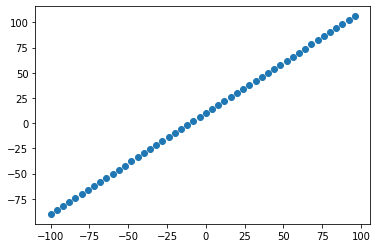

In [66]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70% - 80% of total data
* **Validation set** - the model gets tuned on this data which is typically 10% - 15% of data available
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10% - 15% of the total data available

In [67]:
# Check the length of how many sampes we have
len(X)

50

In [69]:
# Split the data into train and test sets
X_train = X[:40] # first 40 training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)